<a href="https://colab.research.google.com/github/tackulus/229352/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/tackulus/229352.git

Cloning into '229352'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 69 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [1]:
import numpy as np
import pandas as pd

In [7]:
paths = [
    "/content/229352/dataset/Lab05_X_train.csv",
    "/content/229352/dataset/Lab05_X_test.csv",
    "/content/229352/dataset/Lab05_y_train.csv",
    "/content/229352/dataset/Lab05_y_test.csv"
]

X_train = pd.read_csv(paths[0], header=None)
X_test = pd.read_csv(paths[1], header=None)
y_train = pd.read_csv(paths[2], header=None)
y_test = pd.read_csv(paths[3], header=None)

# Bagging

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3
)

clf.fit(X_train,y_train)
clf.best_params_

AttributeError: ignored

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

noT = range(1, 102)
arr = []
for j in range(10):
    accuracy = []
    for i in noT:
        clf = RandomForestClassifier(
            criterion="entropy", 
            max_depth=3, 
            max_features=4,
            n_estimators=i
        )
        
        clf.fit(X_train, y_train.to_numpy().ravel())
        score = clf.score(X_test, y_test)
        accuracy.append(score)
    arr.append(accuracy)

arr = np.array(arr)
accuracy2 = np.mean(arr, axis=0)

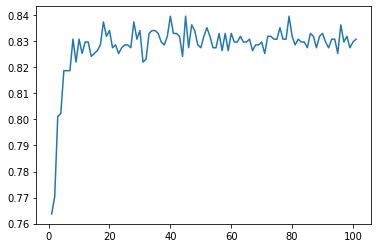

In [10]:
import matplotlib.pyplot as plt

plt.plot(noT, accuracy2)
plt.show()

# AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier

noT = range(1, 102)
accuracy = []
for i in noTree:
    clf = AdaBoostClassifier(
        n_estimators=i
    )
    
    clf.fit(X_train, y_train.to_numpy().ravel())
    score = clf.score(X_test, y_test)
    accuracy.append(score)

In [19]:
from sklearn.ensemble import AdaBoostClassifier

noT = range(1, 102)
arr = []
for j in range(10):
    accuracy = []
    for i in noT:
        clf = AdaBoostClassifier(
            n_estimators=i
        )
        
        clf.fit(X_train, y_train.to_numpy().ravel())
        score = clf.score(X_test, y_test)
        accuracy.append(score)
    arr.append(accuracy)

arr = np.array(arr)
accuracy3 = np.mean(arr, axis=0)

In [20]:
accuracy3

array([0.69230769, 0.67032967, 0.83516484, 0.81318681, 0.8021978 ,
       0.8021978 , 0.82417582, 0.8021978 , 0.81318681, 0.8021978 ,
       0.82417582, 0.81318681, 0.8021978 , 0.83516484, 0.79120879,
       0.82417582, 0.79120879, 0.8021978 , 0.79120879, 0.8021978 ,
       0.81318681, 0.79120879, 0.78021978, 0.79120879, 0.78021978,
       0.81318681, 0.8021978 , 0.8021978 , 0.81318681, 0.81318681,
       0.81318681, 0.8021978 , 0.81318681, 0.81318681, 0.81318681,
       0.81318681, 0.82417582, 0.82417582, 0.82417582, 0.82417582,
       0.8021978 , 0.8021978 , 0.81318681, 0.79120879, 0.79120879,
       0.8021978 , 0.81318681, 0.8021978 , 0.8021978 , 0.8021978 ,
       0.81318681, 0.8021978 , 0.81318681, 0.81318681, 0.81318681,
       0.8021978 , 0.81318681, 0.81318681, 0.8021978 , 0.8021978 ,
       0.8021978 , 0.8021978 , 0.81318681, 0.81318681, 0.82417582,
       0.81318681, 0.79120879, 0.79120879, 0.81318681, 0.78021978,
       0.81318681, 0.79120879, 0.79120879, 0.78021978, 0.79120

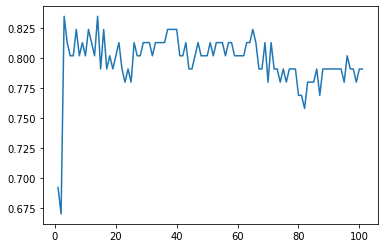

In [21]:
plt.plot(noT, accuracy3)
plt.show()